In [0]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

library(caTools) # linear algebra
library(dplyr) # data processing, CSV file I/O (e.g. pd.read_csv)

list.files(path = "../input")
library(MASS)
#install.packages("dplyr")
#install.packages("ISLR")
library(ISLR)
library(caret)
library(ggplot2)
## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0.9000     ✔ purrr   0.3.1     
✔ tibble  2.0.1          ✔ dplyr   0.8.0.1   
✔ tidyr   0.8.3          ✔ stringr 1.4.0     
✔ readr   1.3.1          ✔ forcats 0.4.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "users_jokes_ratings.csv"


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select

Loading required package: lattice
Warning message:
“replacing previous import ‘ggplot2::empty’ by ‘plyr::empty’ when loading ‘caret’”
Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [0]:
data=read.csv("../input/users_jokes_ratings.csv")

# Any results you write to the current directory are saved as output.
names(data)

[1] "user"   "joke"   "rating"

In [0]:
mean(data$rating)
median(data$rating)
mode(data$rating)
sd(data$rating)

[1] 1.618603

[1] 2.219

[1] "numeric"

[1] 5.302609

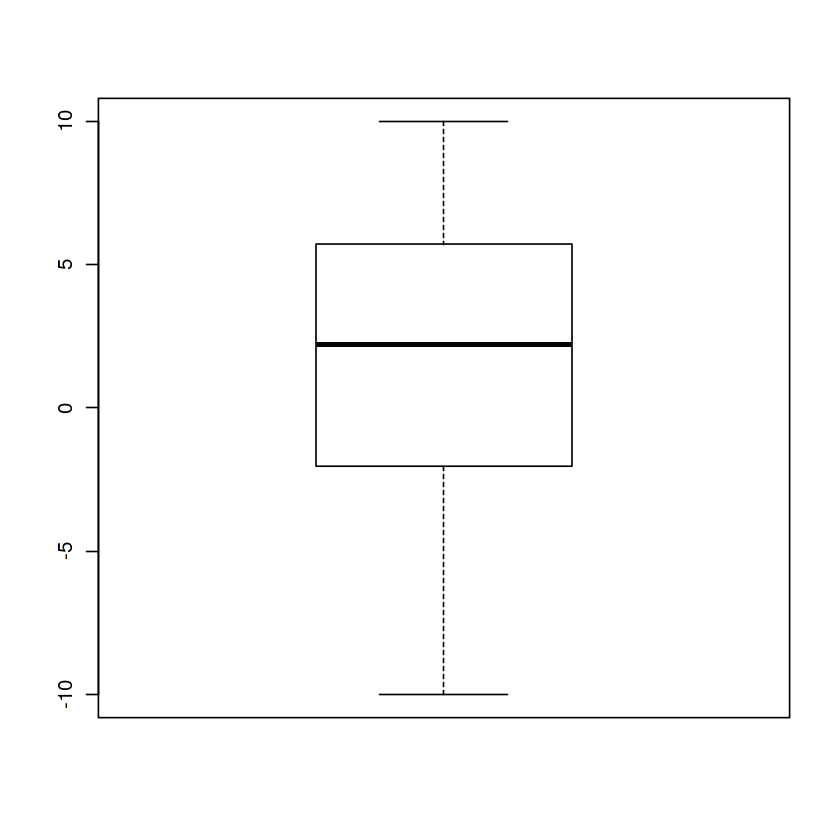

In [0]:
boxplot(data$rating)

In [0]:
summary(data)

      user            joke            rating       
 Min.   :    1   Min.   :  5.00   Min.   :-10.000  
 1st Qu.:17202   1st Qu.: 21.00   1st Qu.: -2.031  
 Median :34808   Median : 69.00   Median :  2.219  
 Mean   :32723   Mean   : 70.71   Mean   :  1.619  
 3rd Qu.:47306   3rd Qu.:112.00   3rd Qu.:  5.719  
 Max.   :63978   Max.   :150.00   Max.   : 10.000  

In [0]:
table(is.na(data$user))
table(is.na(data$joke))
table(is.na(data$rating))


  FALSE 
1761438 


  FALSE 
1761438 


  FALSE 
1761438 

In [0]:
head(data)

user joke rating
1 1     7   -9.281
2 1     8   -9.281
3 1    13   -6.781
4 1    15    0.875
5 1    16   -9.656
6 1    17   -9.031

In [0]:
val=unique(data$user)


In [0]:
joke=unique(data$joke)


In [0]:
val
joke


[1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    22    23    24    25    26
   [25]    27    28    29    33    34    35    37    38    39    40    41    42
   [37]    43    44    45    46    47    48    49    50    51    52    53    54
   [49]    55    56    57    58    59    60    61    62    63    64    65    66
   [61]    67    68    71    72    73    74    75    76    77    79    80    81
   [73]    82    83    84    85    86    87    88    89    90    93    94    95
   [85]    96    97    98   100   101   102   103   104   105   106   107   108
   [97]   109   110   111   112   114   115   116   117   118   119   121   123
  [109]   124   125   126   127   129   130   131   132   133   134   135   136
  [121]   137   138   139   140   141   142   143   144   145   146   147   148
  [133]   149   150   151   152   153   154   155   156   157   158   159   161
  [145]   162   163   164   165   166   167   168   169   171   172   173   174
  [157]   175   177   178   179   180   181   182   183   184   185   186   187
  [169]   188   190   191   192   193   194   195   196   197   198   199   201
  [181]   202   203   204   205   206   207   208   209   210   211   212   213
  [193]   214   215   216   217   218   219   220   221   222   223   224   225
  [205]   226   227   228   229   230   231   232   233   234   235   236   237
  [217]   239   240   241   242   243   244   245   246   247   248   249   250
  [229]   251   253   254   256   257   258   259   260   261   262   263   265
  [241]   267   268   269   270   271   272   273   274   276   277   278   279
  [253]   280   281   282   283   284   287   288   290   292   293   294   295
  [265]   296   297   298   299   300   301   302   304   305   306   307   308
  [277]   309   310   311   313   314   315   316   317   318   319   320   321
  [289]   322   323   324   325   326   327   328   329   330   332   333   335
  [301]   336   337   338   339   340   341   342   343   344   345   346   347
  [313]   348   349   350   352   353   354   355   356   357   358   359   360
  [325]   362   363   364   365   366   367   368   369   370   371   372   373
  [337]   374   375   376   377   378   379   381   382   383   384   385   386
  [349]   387   388   389   390   391   392   393   394   395   396   397   398
  [361]   399   400   401   402   404   405   406   407   408   409   410   411
  [373]   412   413   414   415   416   418   419   421   422   424   425   426
  [385]   427   428   429   430   431   432   433   434   435   436   437   438
  [397]   439   440   441   442   443   444   445   446   447   448   449   450
  [409]   451   452   453   454   455   456   457   458   459   460   461   462
  [421]   463   464   465   466   468   469   470   471   472   473   474   475
  [433]   476   477   478   479   480   481   482   483   484   485   486   487
  [445]   488   489   490   491   493   494   495   496   497   498   499   500
  [457]   501   502   503   504   505   506   507   508   509   510   513   514
  [469]   515   516   517   518   519   520   521   522   523   524   525   526
  [481]   527   528   529   530   531   532   533   534   535   536   537   538
  [493]   539   540   541   542   543   544   546   547   548   549   551   552
  [505]   553   556   557   558   559   560   561   562   563   564   565   566
  [517]   567   568   569   570   571   572   573   574   575   576   577   578
  [529]   579   580   581   582   583   584   587   588   589   590   591   592
  [541]   593   594   595   596   597   598   599   600   601   602   603   604
  [553]   605   606   607   608   609   610   611   612   614   615   616   617
  [565]   618   619   620   621   622   623   624   625   626   627   628   629
  [577]   630   631   632   633   634   635   636   637   638   639   640   641
  [589]   642   643   644   645   646   647   648   649   650   651   652   653
  [6

[1]   7   8  13  15  16  17  18  19  20  21  22  23  24  25  89  50 102 103
 [19] 104 105 106 107 108 109  87  93  76  65  72  27  36 119 120  35  53  91
 [37]  83  32 121 123  29  31  66  69  54 127 128  42  80  49  62  34  51  52
 [55]  68  81  61  26  92 118 134   5  28  30  48  33  37  38  39  40  41  43
 [73]  44  56  78  97  96  88  95  47  94  46  82  45  73  84  77  70  90  63
 [91]  85 101 100  99  55  86  98  59  60  57  58  64  67  71  75  79  74 110
[109] 111 112 113 114 115 116 117 126 129 125 122 124 131 130 132 133 135 136
[127] 137 138 139 140 141 142 143 144 145 146 147 148 149 150

In [0]:
n=length(val)
n



[1] 59132

In [0]:
m=length(joke)
mat=matrix(data$rating, nrow = n,ncol=m, byrow = TRUE, dimnames = list(val,joke))

Warning message in matrix(data$rating, nrow = n, ncol = m, byrow = TRUE, dimnames = list(val, :
“data length [1761438] is not a sub-multiple or multiple of the number of rows [59132]”

In [0]:
mat

7      8      13     15     16     17     18     19     20     21     ⋯
1     -9.281 -9.281 -6.781  0.875 -9.656 -9.031 -7.469 -8.719 -9.156 -7.188 ⋯
2      0.438  2.594  0.781  6.000  7.062  6.375  1.188  0.562  0.344  8.000 ⋯
3      2.281 -1.000 -4.406  2.125  1.969 -3.562  4.000  6.062  0.406  6.750 ⋯
4     -0.094  1.375 -0.812  1.875  0.094  1.875 -0.594 -0.375  1.031  2.750 ⋯
5      1.562  3.344  2.250  4.094 -7.438 -6.781 -3.844  1.750 -7.219  3.156 ⋯
6     -6.312 -8.688 -4.438 -4.531 -1.719  9.969  8.094 -8.969 -5.188  2.531 ⋯
7      6.625  6.906  6.312 -2.406  5.469 -8.625 -8.406 -8.250  4.156 -9.188 ⋯
8     -6.094  6.625  7.219  2.344  0.469 -6.219  6.375  2.781  2.656 -3.062 ⋯
9      1.375 -3.375 -7.594  7.750  8.938  8.875  3.281  9.500 -9.094 -6.562 ⋯
10     0.594  0.406  0.594  9.875  9.719 -4.188  5.156 -3.688  7.281 -4.188 ⋯
11     9.844  9.969 -8.969 -9.781 -0.250  9.781  9.188  9.656  9.250  9.781 ⋯
12     6.219  4.875  5.906  0.312 -3.344  2.062  2.719  3.719  3.812  0.219 ⋯
13     6.562  6.938  6.781  8.750  1.656  8.281  8.281  7.500  7.375  0.500 ⋯
14     2.531  6.094  6.094  2.375  1.938  3.938  3.938  5.844  3.406  1.688 ⋯
15     7.469  7.250  8.594 -2.344  1.219  8.688 -5.750  1.562 -1.594  5.062 ⋯
16    -7.156 -8.312 -6.750 -9.438 -6.156 -7.344 -6.625 -6.375 -7.969 -7.219 ⋯
17     4.031  4.844 -0.438 -5.719  3.844  3.125  4.594  0.906 -0.438  2.938 ⋯
18    -9.625 -9.531 -9.531 -9.625  3.625 -9.375 -9.469 -9.531 -9.531 -9.531 ⋯
19     7.094  6.281  3.625  3.531  9.156  3.875  3.969  3.656  8.625  8.875 ⋯
22     9.969 10.000 10.000 10.000 10.000 10.000  9.875  9.875  9.875  9.875 ⋯
23     1.688  0.094 -0.312 -0.188  1.531  3.375 -3.875 -1.875 -3.531 -2.500 ⋯
24     3.188 -1.781 -8.688  7.562  7.250  3.281  9.688 -0.156  1.844  4.344 ⋯
25    -8.438 -8.438 -8.438 -8.438  5.688  5.688  4.219  4.375  8.094  8.094 ⋯
26     2.188 -3.844 -3.156 -5.438 -4.031 -4.312 -4.156 -4.719 -5.719 -9.594 ⋯
27     3.000  1.125 -3.594 -3.500  1.188  3.281 -0.312  1.594  1.594 -1.125 ⋯
28     3.344  8.188 -0.156 -1.625 -1.375 -0.375  9.250  4.344 -0.219 -5.562 ⋯
29     5.750  8.219 -5.031  3.469  0.031 -0.938  3.688  6.375  3.875  0.781 ⋯
33    -1.188 -1.812 -1.875  0.656  5.000  3.375  4.125 -5.875  3.625  3.938 ⋯
34     3.562  1.406 -0.469  3.938  2.125 -3.219 -1.594 -2.594 -2.500  5.125 ⋯
35    -5.875  8.438  0.438  3.062 -8.812 -0.062  4.844 -6.438 -0.375  0.500 ⋯
⋮     ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋮      ⋱
63943  1.438 -2.375  0.844 -6.594 -2.312 -2.156  1.875 -1.500  1.281  0.562 ⋯
63944 -1.250 -2.719 -2.031 -2.375  1.719  0.969  2.531 -3.250  1.812 -3.875 ⋯
63945  6.062 -1.812 -3.688 -1.344 -1.625  4.281  4.469 -1.906 -5.156 -5.625 ⋯
63946  3.781  4.656  2.250  0.781  5.125  5.938  7.375  7.031 -2.625  4.281 ⋯
63947 -3.594  1.438  2.406  0.938  2.188  2.938 -5.000 -4.562 -1.062 -1.094 ⋯
63949 -1.719 -3.594  3.531  2.156  2.188  1.656 -8.219 -3.625  5.500  7.625 ⋯
63950 -2.562 -4.312  5.812  3.312  2.562  2.625 -2.250  6.125  7.625  6.812 ⋯
63951  8.938  8.938  1.406 -9.719  0.094  1.156 -9.062 -9.062 -6.875  2.281 ⋯
63952 -9.812 -5.656 -4.719  4.344  4.156 -1.125 -0.125  4.688  6.469  3.156 ⋯
63953  6.688  5.312  2.688  0.031  6.938  9.344  5.188  6.656  8.281  2.875 ⋯
63955  5.250  2.906  3.000  1.656  4.000  5.250  6.906  5.562  1.844  4.281 ⋯
63956  4.812  6.688  5.500  8.031  8.219 -4.875  2.438 -5.969 -5.188 -4.969 ⋯
63957  4.562  4.312 -3.188 -4.500  2.594  2.562 -6.062  4.406 -2.562  6.125 ⋯
63958  7.812 -0.125  8.469  8.281  9.062  8.188  8.281 -3.531  8.688  7.969 ⋯
63960  4.094  0.000  1.469  1.906  1.750  2.750 -0.375  2.562  2.562  2.312 ⋯
63961  2.438  4.406 -1.250  0.156  9.812 -2.844 -5.094 -6.656  0.156 -1.781 ⋯
63962 -6.094 -6.000 -5.906  0.406  4.531  6.844  4.438  4.312 -2.594  3.812 ⋯
63963 -9.812  4.031  0.562  2.031  6.062 -5.969 -5.438 -2.281 -2.750 -3.469 ⋯
63964  1.031  1.031 -7.281  6.844 -1.625  7.375  7.562  7.656  8.656  7.156 ⋯
63966  4.031  4.469  1.812  

In [0]:
model=svd(mat)


In [0]:
summary(model)


  Length  Class  Mode   
d     140 -none- numeric
u 8278480 -none- numeric
v   19600 -none- numeric

In [0]:
D <- diag(model$d)

In [0]:
output_prediction_for_users=t(model$u) %*% mat %*% model$v #  D = U' X V
strength_of_joke_for_user=model$u %*% D %*% t(model$v) #  X = U D V'
print(strength_of_joke_for_user)
class(strength_of_joke_for_user)


                  [,1]          [,2]          [,3]          [,4]          [,5]
    [1,] -9.281000e+00 -9.281000e+00 -6.781000e+00  8.750000e-01 -9.656000e+00
    [2,]  4.380000e-01  2.594000e+00  7.810000e-01  6.000000e+00  7.062000e+00
    [3,]  2.281000e+00 -1.000000e+00 -4.406000e+00  2.125000e+00  1.969000e+00
    [4,] -9.400000e-02  1.375000e+00 -8.120000e-01  1.875000e+00  9.400000e-02
    [5,]  1.562000e+00  3.344000e+00  2.250000e+00  4.094000e+00 -7.438000e+00
    [6,] -6.312000e+00 -8.688000e+00 -4.438000e+00 -4.531000e+00 -1.719000e+00
    [7,]  6.625000e+00  6.906000e+00  6.312000e+00 -2.406000e+00  5.469000e+00
    [8,] -6.094000e+00  6.625000e+00  7.219000e+00  2.344000e+00  4.690000e-01
    [9,]  1.375000e+00 -3.375000e+00 -7.594000e+00  7.750000e+00  8.938000e+00
   [10,]  5.940000e-01  4.060000e-01  5.940000e-01  9.875000e+00  9.719000e+00
   [11,]  9.844000e+00  9.969000e+00 -8.969000e+00 -9.781000e+00 -2.500000e-01
   [12,]  6.219000e+00  4.875000e+00  5.906000e+00  

[1] "matrix"

In [0]:
val=as.data.frame.matrix(strength_of_joke_for_user)

[1] "V1"   "V2"   "V3"   "V4"   "V5"   "V6"   "V7"   "V8"   "V9"   "V10" 
 [11] "V11"  "V12"  "V13"  "V14"  "V15"  "V16"  "V17"  "V18"  "V19"  "V20" 
 [21] "V21"  "V22"  "V23"  "V24"  "V25"  "V26"  "V27"  "V28"  "V29"  "V30" 
 [31] "V31"  "V32"  "V33"  "V34"  "V35"  "V36"  "V37"  "V38"  "V39"  "V40" 
 [41] "V41"  "V42"  "V43"  "V44"  "V45"  "V46"  "V47"  "V48"  "V49"  "V50" 
 [51] "V51"  "V52"  "V53"  "V54"  "V55"  "V56"  "V57"  "V58"  "V59"  "V60" 
 [61] "V61"  "V62"  "V63"  "V64"  "V65"  "V66"  "V67"  "V68"  "V69"  "V70" 
 [71] "V71"  "V72"  "V73"  "V74"  "V75"  "V76"  "V77"  "V78"  "V79"  "V80" 
 [81] "V81"  "V82"  "V83"  "V84"  "V85"  "V86"  "V87"  "V88"  "V89"  "V90" 
 [91] "V91"  "V92"  "V93"  "V94"  "V95"  "V96"  "V97"  "V98"  "V99"  "V100"
[101] "V101" "V102" "V103" "V104" "V105" "V106" "V107" "V108" "V109" "V110"
[111] "V111" "V112" "V113" "V114" "V115" "V116" "V117" "V118" "V119" "V120"
[121] "V121" "V122" "V123" "V124" "V125" "V126" "V127" "V128" "V129" "V130"
[131] "V131" "V132" "V133" "V134" "V135" "V136" "V137" "V138" "V139" "V140"

In [0]:
df2<-data.frame()
for (i in 1:nrow(val)){
 df2[i,1]<-colnames(val[which.max(val[i,])])
}

In [0]:
df2

V1  
1     V77 
2     V79 
3     V94 
4     V102
5     V92 
6     V55 
7     V99 
8     V121
9     V8  
10    V127
11    V48 
12    V85 
13    V128
14    V101
15    V44 
16    V50 
17    V22 
18    V30 
19    V111
20    V4  
21    V66 
22    V7  
23    V82 
24    V13 
25    V140
26    V111
27    V36 
28    V94 
29    V37 
30    V135
⋮     ⋮   
59103 V85 
59104 V69 
59105 V121
59106 V48 
59107 V137
59108 V137
59109 V15 
59110 V111
59111 V15 
59112 V51 
59113 V94 
59114 V5  
59115 V12 
59116 V52 
59117 V46 
59118 V5  
59119 V140
59120 V59 
59121 V46 
59122 V44 
59123 V19 
59124 V95 
59125 V43 
59126 V100
59127 V115
59128 V47 
59129 V59 
59130 V108
59131 V57 
59132 V136

In [0]:
names(outval)[apply(outval, 1, which.max)] 

NULL

ERROR: Error in ifelse(jester_matrix[i, j] == 0, NA, R[i, j]): object 'jester_matrix' not found


ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘normalize’ for signature ‘"data.frame"’


ERROR: Error in (function (classes, fdef, mtable) : unable to find an inherited method for function ‘evaluationScheme’ for signature ‘"data.frame"’
